## Note on MPPI Algorithm

Consider we have state dynamics system, which the state transition define as

\begin{equation}
x_{t+1}=F(x_{t},v_{t}
\end{equation}

Where $x_{t}\in{\mathbb{R}^{n}}$ is the state of our system at time $t$, $v_{t}\in{\mathbb{R}^{m}}$. \\
Considering we do not have direct input control to the system, but rather that $v_{t}$ is a random vector generate by a white noise process with the density function 

\begin{equation}
    v_{t} \sim \mathcal{N(u_{t},\,\Sigma)}
\end{equation}

The $u_{t}$ is the direct control mean value. In some scenarios, having the noise process to be added into the system is helpful, since for some systems does contain noise that could produces from the mechanical transmission, or scale reduction, ...etc. <br>
This artifical noise can be generated with this probability density function, considering the sequence of inputs

\begin{equation}
    (v_{0}, v_{1}, ...,v_{T-1}) = V \in{\mathbb{R}^{m \times T}}
\end{equation}

Hence the generate mean input are defined as

\begin{equation}
    (u_{0}, u_{1},...,u_{T-1}) = U \in{\mathbb{R}^{m \times T}}
\end{equation}
Therefore,

\begin{align}
    p(V|U,\Sigma) &= \prod_{t=0}^{T-1} Z^{-1} \exp{\left( -\frac{1}{2}(v_{t}-u_{t})^{T}\Sigma^{-1} (v_{t}-u_{t}) \right)} \\
                  &= Z^{-T} \exp{\left( -\frac{1}{2} \sum_{t=0}^{T-1}(v_{t}-u_{t})^{T}\Sigma^{-1} (v_{t}-u_{t}) \right)}
\end{align}

Which $Z^{-1}=((2\pi)^{m}\| \Sigma \|)^{\frac{1}{2}}$

Given a running cost function $\mathcal{L}(x_{t},u_{T})$ and a terminal cost $\phi(x_{T})$, hence we can define the optimal control problem as 

\begin{equation}
    U^* = \arg\min_{U \in \mathcal{U}} \mathbb{E}_{Q_{U, \Sigma}} \left[ \phi(x_T) + \sum_{t=0}^{T-1} \mathcal{L}(x_t, u_t) \right].
\end{equation}
 
Where $\mathcal{U}$ is admissible command sequences. <br>
We assume that the running cost can be split into the arbitary state-dependent running cost which is a quadratic function of the system noise. <br>

\begin{equation}
    \mathcal{L}(x_{t},u_{t}) = c(x_{t}) + \frac{\lambda}{2}\left( u_{t}^{T}\Sigma^{-1}u_{t} + \beta_{T}u_{t} \right)
\end{equation}

The affine term $\beta$ can allows the location of the minimum control cost to be moved away from zero (although $\beta$=0 is the standard case). Next denote the portion cost of the trajectory
\begin{equation}
    C(x_{0},...,x_{T}) = \phi(x_{T})+\sum_{t=0}^{T-1}c(x_{t})
\end{equation} 
Some neccessary conditions, must be taken into. Hence we can have a transforms to the resulting trajectory with the given initial condition to ensure or guarantee the optimization problem.

\begin{equation}
    \mathcal{H}(V;x_{0}) = \left( x_{0}, F(x_{0},v_{0}), F(F(x_{0},v_{0}),v1),... \right).
\end{equation}
The the state-cost of an input sequence is defined as a composition function
\begin{equation}
    S(V;x_{0})=C(\mathcal{H}(V;x_{0}))
\end{equation}

From this transform, we can have two quantities from the information theory.
### First
We define the free-energy control of a system
\begin{equation}
    \mathcal{F}(S,p,x_{0},\lambda) = \log{\mathbb{E_{\mathbb{P}}} \left[ \exp{\left( -\frac{1}{\lambda} S(V) \right)}  \right] }
\end{equation}

Which $\lambda \in{\mathbb{R}^{+}} $ is the inverted temperature. Let's $\mathbb{F}, \mathbb{H}$ be two probability distribution that are absolute continuous with each other. Hence we can use KL-Divergence between $\mathbb{F}, \mathbb{H}$

\begin{equation}
    \mathbb{D}_{KL}(\mathbb{F}|\mathbb{H}) = \mathbb{E}_{\mathbb{F}}\left[ \log{\frac{f(V)}{h(V)}} \right]
\end{equation}

## Information-Theoretic Model Predictive Control

Consider a base distribution $\mathbb{P}$ and a distribution induced by an open-loop control sequence $\mathbb{Q}_{U, \Sigma}$ and suppose that these distributions are absolutely continuous with each other. We start by making the following observation.

\begin{align}
    \mathcal{F}(S,p,x_{0},\lambda) &= \log{\mathbb{E}_{\mathbb{P}} \left[ \exp{-\frac{1}{\lambda}S(V)} \right] } \\
                                   &= \log{\left( \mathbb{E}_{\mathbb{Q}_{U, \Sigma}} \left[ \exp{ \left( -\frac{1}{\lambda} S(V) \frac{p(V)}{q(V|U, \Sigma} \right)}  \right] \right)}
\end{align}

Using the concavity algorithm, we can apply Jensen's inequality

\begin{equation}
    \mathcal{F}(S,p,x_{0},\lambda) \geq{} \mathbb{E}_{Q_{U, \Sigma}} \left[ \log{\left( \exp{\left( -\frac{1}{\lambda}S(V) \right)} \frac{p(V)}{q(V|U,\Sigma} \right)} \right]
\end{equation}

The right-hand side equation can be simplified

\begin{align}
    &= -\frac{1}{\lambda}\mathbb{E}_{Q_{U, \Sigma}} \left[ S(V) + \lambda \log{\frac{q(V|U, \Sigma)}{p(V)}} \right] \\
    &= -\frac{1}{\lambda}\left( \mathbb{E}[S(V)] + \lambda \mathbb{D}_{KL}(\mathbb{Q}_{U, \Sigma} || \mathbb{P}) \right)
\end{align}
After the substitution, we get
\begin{equation}
    -\lambda \mathcal{F}(S,p,x_{0},\lambda) \leq{\mathbb{E}_{Q_{U, \Sigma}} \left[ S(V) + \lambda \mathbb{D}_{KL}(\mathbb{Q}_{U, \Sigma} || \mathbb{P})  \right]}
\end{equation}

More concretely, suppose we assign the base distribution as:

\begin{equation}
    p(V) = q(V|\tilde{U},\Sigma)
\end{equation}

where $\tilde{U}$ represents the nominal control input applied to the system. Then the KL-Divergence between $\mathbb{Q}_{U, \Sigma}$ and $\mathbb{Q}_{\tilde{U}, \Sigma}$ is

\begin{align}
    \mathbb{D}_{KL} \left(Q_{U, \Sigma} || \mathbb{Q}_{\tilde{U}, \Sigma} \right) &= \frac{1}{2} \sum_{t=0}^{T-1}(u_{t}-\tilde{u}_{t})^{T}\Sigma^{-1}(u_{t}-\tilde{u}_{t}) \\ 
    &= \frac{1}{2}\sum_{t=0}^{T-1}\left( u_{t}^{T} \Sigma^{-1}u_{t} - \tilde{u}_{t}^{T} \Sigma^{-1}u_{t} +\tilde{u}_{t}^{T} \Sigma^{-1} \tilde{u}_{t} \right )
\end{align}
which we set $\beta_{T}=-\tilde{u}_{t}^{T} \Sigma^{-1}$ and $c=\tilde{u}^{T}\Sigma^{-1}\tilde{u}$, we get

\begin{equation}
    \mathbb{D}_{KL} \left(Q_{U, \Sigma} || \mathbb{Q}_{\tilde{U}, \Sigma} \right) = \frac{1}{2}\sum_{t=0}^{T-1}(u_{t}^{T}\Sigma^{-1}u_{t}+\beta_{t}^{T}u_{t}+c_{t})
\end{equation}

We obtain
\begin{equation}
    \mathbb{E}_{\mathbb{Q}_{U, \Sigma}}\left[ \phi(x_{T}) + \sum_{t=0}^{T-1}c(x_{t}) + \frac{\lambda}{2}(u_{t}+\beta_{t}^{T}u_{t}+c_{t}) \right]
\end{equation}

Hence the equivalent to cost function at the equation of the optimal control problem. It allows us to conclude
\begin{equation}
    -\lambda \mathcal{F}(S,p,x_{0},\lambda)  \leq{\mathbb{E}_{\mathbb{Q}_{U, \Sigma}}} \left[ \phi(x_{T}) + \sum_{t=0}^{T-1}\mathcal{L}(x_{t},u_{t}) \right]
\end{equation}

### Optimal Distribution

We define the optimal control density function $\mathbb{Q}^{*}$ as follows

\begin{align}
    q^{*}(V) &= \frac{1}{\eta}\exp{\left( -\frac{1}{\lambda}S(V) \right)}p(V) \\
          \eta &= \int_{\mathbb{R}^{m \times T}} \exp{\left( -\frac{1}{\lambda}S(V) \right)}p(V)dV
\end{align}

Let's put it inside the KL-Divergence

\begin{align}
    \mathbb{D}_{KL}(\mathbb{Q} || \mathbb{P}) &= \mathbb{E}_{\mathbb{Q}^{*}}\left[ \log{\left( \frac{\frac{1}{\eta}\exp{-\frac{1}{\lambda}S(V)p(V)}}{p(V)} \right) dV} \right] \\
    &= -\frac{1}{\lambda}\mathbb{E}_{\mathbb{Q}^{*}}\left[ S(V) \right] - \log{\eta}
\end{align}

Insert this KL-Divergence
we get,

\begin{equation}
    -\lambda\mathcal{F} = -\lambda \log{\left( \mathbb{E}_{\mathbb{P}} \left[ -\frac{1}{\lambda} S(V) \right] \right)}    
\end{equation}

Since the RHS is precisely the definition of $-\lambda \mathcal{F}(S,p,x_{0},\lambda)$, the inequality reduces to an equality and we have established the optimality of $q^{*}(V)$. 

### KL-Divergence Minimization

We aim to align the controlled distribution $\mathbb{Q}_{U, \Sigma}$ with the optimal distribution $\mathbb{Q}^{*}$. It can be achieved by minimizing the KL-Divergence

\begin{equation}
    U^{*} = \arg\min_{U \in \mathcal{U}} \left[ \mathbb{D}_{KL}(\mathbb{Q}^{*} || \mathbb{Q}_{U, \Sigma}) \right]
\end{equation}
<p align="center">
    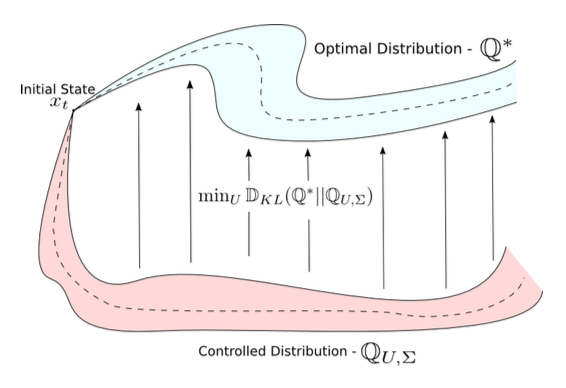
</p>

Now expanding the objective we obtain

\begin{align*}
    U^{*} &= \arg\min_{U \in \mathcal{U}} \left[ \mathbb{E}_{\mathbb{Q}^{*}} \left[ \log{\frac{q^{*}(V)}{q(V|U, \Sigma}} \right] \right] \\
          &= \arg\min_{U \in \mathcal{U}} \left[ \mathbb{E}_{\mathbb{Q}} \left[ \log{q^{*}(V)} \right] - \mathbb{E}_{\mathbb{Q}^{*}} \left[ \log{q(V|U, \Sigma} \right] \right] \\
          &= \arg\max_{U \in \mathcal{U}} \left[ \mathbb{E}_{\mathbb{Q}^{*}} \left[ \log{q(V|U, \Sigma} \right] \right]
\end{align*}